##ММО Гринин Олег ИУ5-22М
###Вариант 1

####Задание 1. Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "count (frequency) encoding".
####Задание 2. Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по медиане.
####Задание 3. Для произвольной колонки данных построить гистограмму

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://github.com/OlegusOfficial/ML/blob/main/weather.csv?raw=True')

In [4]:
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
df.Location.isnull().any()

False

В Location пропусков данных - нет

###Count or frequency encoding

In [7]:
count_map_location = df['Location'].value_counts().to_dict()

In [10]:
count_map_location

{'Adelaide': 3090,
 'Albany': 3016,
 'Albury': 3011,
 'AliceSprings': 3031,
 'BadgerysCreek': 2928,
 'Ballarat': 3028,
 'Bendigo': 3034,
 'Brisbane': 3161,
 'Cairns': 2988,
 'Canberra': 3418,
 'Cobar': 2988,
 'CoffsHarbour': 2953,
 'Dartmoor': 2943,
 'Darwin': 3192,
 'GoldCoast': 2980,
 'Hobart': 3188,
 'Katherine': 1559,
 'Launceston': 3028,
 'Melbourne': 2435,
 'MelbourneAirport': 3009,
 'Mildura': 3007,
 'Moree': 2854,
 'MountGambier': 3030,
 'MountGinini': 2907,
 'Newcastle': 2955,
 'Nhil': 1569,
 'NorahHead': 2929,
 'NorfolkIsland': 2964,
 'Nuriootpa': 3002,
 'PearceRAAF': 2762,
 'Penrith': 2964,
 'Perth': 3193,
 'PerthAirport': 3009,
 'Portland': 2996,
 'Richmond': 2951,
 'Sale': 3000,
 'SalmonGums': 2955,
 'Sydney': 3337,
 'SydneyAirport': 3005,
 'Townsville': 3033,
 'Tuggeranong': 2998,
 'Uluru': 1521,
 'WaggaWagga': 2976,
 'Walpole': 2819,
 'Watsonia': 2999,
 'Williamtown': 2553,
 'Witchcliffe': 2952,
 'Wollongong': 2983,
 'Woomera': 2990}

In [8]:
df['Location'] = df['Location'].map(count_map_location)

In [9]:
df.Location.unique()

array([3011, 2928, 2988, 2953, 2854, 2955, 2929, 2964, 2951, 3337, 3005,
       2976, 2553, 2983, 3418, 2998, 2907, 3028, 3034, 3000, 3009, 2435,
       3007, 1569, 2996, 2999, 2943, 3161, 2980, 3033, 3090, 3030, 3002,
       2990, 3016, 2952, 2762, 3193, 2819, 3188, 3031, 3192, 1559, 1521])

###Масштабирование по медиане

In [27]:
def arr_to_df(arr_scaled, arr):
    res = pd.DataFrame(arr_scaled, columns=df[arr].columns)
    return res

In [30]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

In [12]:
df.MinTemp.isnull().any()

True

In [13]:
mean_temp = df.MinTemp.mean()
df.MinTemp.fillna(mean_temp, inplace=True)

In [14]:
df.MinTemp.isnull().sum()

0

In [21]:
scaler = RobustScaler()
col = df[['MinTemp', 'MaxTemp']]
scaled_columns = scaler.fit_transform(col)

In [28]:
scaled_columns_df = arr_to_df(scaled_columns, ['MinTemp', 'MaxTemp'])
scaled_columns_df.describe()

,MinTemp,MaxTemp
count,142193.000000,141871.000000
mean,0.020261,0.060853
std,0.694448,0.691031
min,-2.228261,-2.660194
25%,-0.478261,-0.456311
50%,0.000000,0.000000
75%,0.521739,0.543689
max,2.380435,2.475728


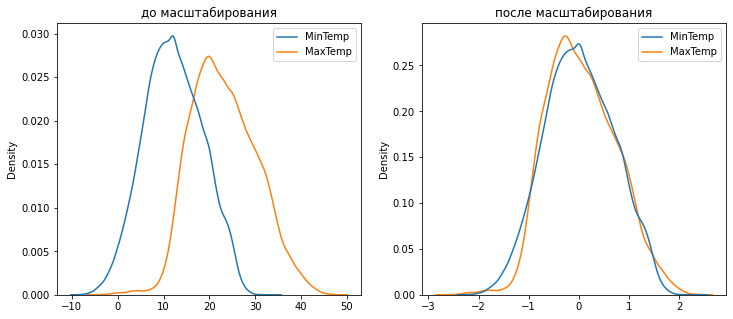

In [32]:
draw_kde(['MinTemp', 'MaxTemp'], df, scaled_columns_df, 'до масштабирования', 'после масштабирования')

###Гистограмма по произвольному столбцу

Text(0.5, 1.0, 'MaxTemp')

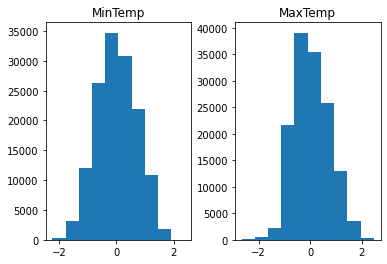

In [57]:
fig, axs = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
axs[0].hist(scaled_columns_df['MinTemp'])
axs[0].set_title('MinTemp')
axs[1].hist(scaled_columns_df['MaxTemp'])
axs[1].set_title('MaxTemp')

(array([  155.,   570.,  2301., 21692., 39080., 35441., 25841., 12944.,
         3531.,   316.]),
 array([-4.8 ,  0.49,  5.78, 11.07, 16.36, 21.65, 26.94, 32.23, 37.52,
        42.81, 48.1 ]),
 <a list of 10 Patch objects>)

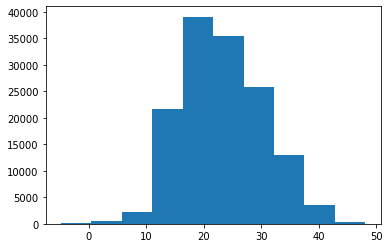

In [34]:
plt.hist(df['MaxTemp'])